In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../' # Expected to be in rank_scripts/

import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os
import fileinput

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net(caffe_root +  'rank_scripts/split7/deploy_split7_atr.prototxt',
                caffe_root + 'rank_scripts/split7/models500/_iter_30000.caffemodel',
                caffe.TEST)# input preprocessing: 'data'is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [3]:
# set net to batch size
net.blobs['data'].reshape(1,3,227,227)

[-12.71450996 -15.87012863 -10.375494   ..., -14.93712044 -13.11560059
 -15.31811905]


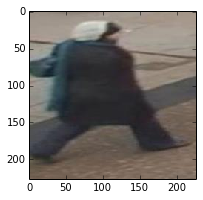

In [11]:
#query_image_path = '/home/jayant/caffe-Person-ReID_triplet/rank_scripts/images_market/0004_c1s6_016996_00.jpg'
#query_image_path = '/home/jayant/vision/PETA/TownCentre/alex_size/1_2.jpg'
query_image_path = '/home/jayant/vision/PETA/TownCentre/Town_gallery_alex/119_1985.jpg'
query_image = caffe.io.load_image(query_image_path)
net.blobs['data'].data[...] = transformer.preprocess('data', query_image)
out = net.forward()
vector_query = out['fc7'][0]
plt.figure(figsize=(3,3))
plt.imshow(query_image)
print vector_query

In [12]:
print net.blobs['data'].data[...][0][2][23][127]

160.0


In [13]:
print net.blobs['fc6'].data[...][0]

[-0. -0. -0. ..., -0. -0. -0.]


In [8]:
#for item in net.blobs['fc6'].data[...][0]:
#    print item,

In [14]:
print query_image[222][127][0]*255

122.000000328


In [25]:
#print net.blobs['conv3'].data[...][0]

In [12]:
#rint net.blobs['conv3'].data[...][0]

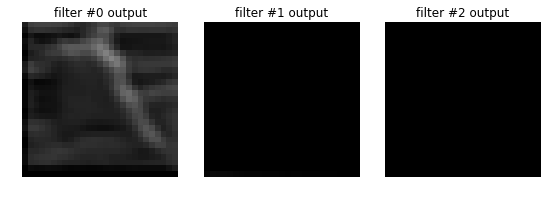

In [15]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv2'].data.min(), net.blobs['conv2'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv2'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

In [16]:
print out['fc8_a'][0]

[ -7.94372129  -9.45897198  -9.15466499   1.78876543   0.9804737
  -8.17720795  -5.2392602   -0.54765087  -4.13991499 -10.55982399
 -11.52645969  -8.22192669  -9.84208679  -7.94830275  -8.01108551
  -6.1031847   -3.14219356  -9.33537674  -6.81492662  -8.16732979
  -8.09669685  -8.01173592  -8.01944637  -7.55945969  -8.39976501
  -0.41048503  -4.40362358  -8.25196075 -10.71881199  -7.61078405
  -7.86213446   8.33360004   6.50325966  -7.8353591   -4.02367878
  -7.69159412  -8.00979233   4.56519699  -8.02914715  -7.21849489
  -7.85184431  -7.95583439  -7.80116177   3.57839775  -4.71782398
  -8.01724911  -8.6589098   -9.40345955  -9.29856682  -7.99001789
  -7.80075264  -5.96760988   2.63563275   5.15935755  -8.24486446
  -8.28093719  -8.00713348   1.60026717   2.78984642  -7.90549183
  -7.91042328  -7.6727109   -8.01578331  -0.61344361 -10.84087467
  -8.16073608  -7.45596313  -7.03990793  -2.84234214  -7.73240995
  -6.89806843  -7.63154554 -11.48855782  -6.80998707  -5.79425478
  -7.498143

In [20]:
label_data_town=[]
for line in fileinput.input('/home/jayant/vision/PETA/TownCentre_atr.txt'):
    label_data_town.append(line[:-2].split(' '))

In [17]:
learned_attribute = []
for item in out['fc8_a'][0]:
    if item > 0:
        learned_attribute.append(1)
    else:
        learned_attribute.append(0)
print learned_attribute
sum1=0
for item in learned_attribute:
    sum1=sum1+ int(item)
print 'sum =',sum1
i=1
for item in learned_attribute:
    if item ==1 :
        print i
    i=i+1


[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
sum = 16
4
5
32
33
38
44
53
54
58
59
77
81
95
100
103
106


In [21]:
check = 118
print label_data_town[check]
sum1=0
for item in label_data_town[check][1:107]:
    sum1=sum1+ int(item)
print 'sum =',sum1
i=1
for item in label_data_town[check][1:107]:
    if item =='1' :
        print i
    i=i+1

['119', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1']
sum = 15
7
26
32
33
44
53
54
64
77
81
90
95
100
101
106
